In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('xAPI-EDU-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Changing the Columns Name

In [9]:
df.columns=['gender','natinallty','placeofbirth','satgeid','gradeid','sectionid','topic','sem','relation','raisehands','visltedresources','annoucementsviwer',
           'dicussion','parentansweringsurvey','parentschoolsatisfaction','studentabsbsencedays','class']

In [10]:
df.shape

(480, 17)

In [11]:
df.dtypes

gender                      object
natinallty                  object
placeofbirth                object
satgeid                     object
gradeid                     object
sectionid                   object
topic                       object
sem                         object
relation                    object
raisehands                   int64
visltedresources             int64
annoucementsviwer            int64
dicussion                    int64
parentansweringsurvey       object
parentschoolsatisfaction    object
studentabsbsencedays        object
class                       object
dtype: object

### Checking the NUll Records

In [13]:
df.isnull().sum()

gender                      0
natinallty                  0
placeofbirth                0
satgeid                     0
gradeid                     0
sectionid                   0
topic                       0
sem                         0
relation                    0
raisehands                  0
visltedresources            0
annoucementsviwer           0
dicussion                   0
parentansweringsurvey       0
parentschoolsatisfaction    0
studentabsbsencedays        0
class                       0
dtype: int64

### Duplicates Record

In [14]:
df.duplicated().sum()

2

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df['class'].value_counts()

M    211
H    142
L    125
Name: class, dtype: int64

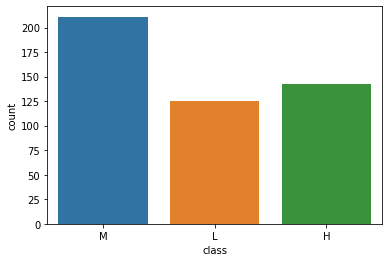

In [19]:
sns.countplot(x=df['class'])
plt.show()

### Diving the object and interger columns

In [21]:
cat_col = [i for i in df.columns if df[i].dtypes=='object']
int_col = [i for i in df.columns if df[i].dtypes!='object']
print(cat_col)
print(len(cat_col))
print(int_col)
print(len(int_col))

['gender', 'natinallty', 'placeofbirth', 'satgeid', 'gradeid', 'sectionid', 'topic', 'sem', 'relation', 'parentansweringsurvey', 'parentschoolsatisfaction', 'studentabsbsencedays', 'class']
13
['raisehands', 'visltedresources', 'annoucementsviwer', 'dicussion']
4


# Univarite Analysis

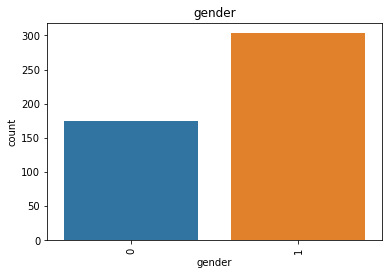

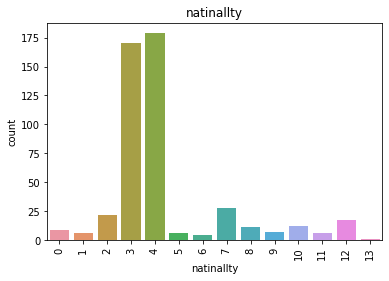

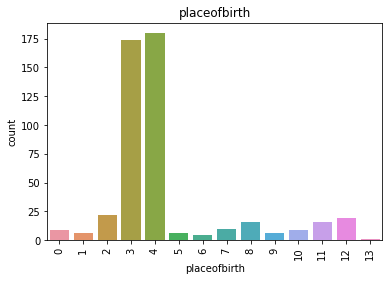

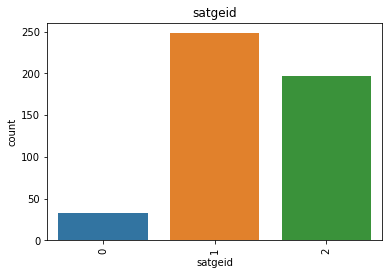

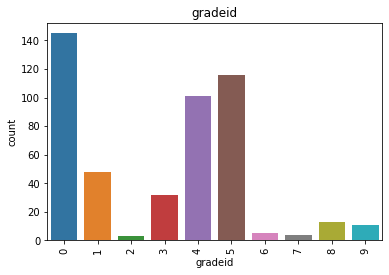

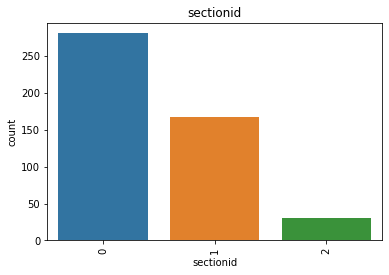

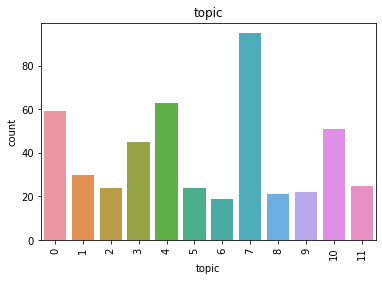

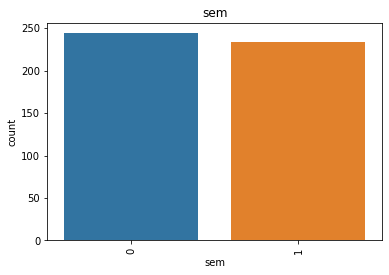

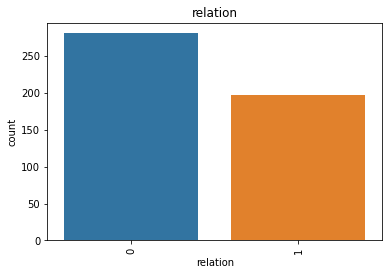

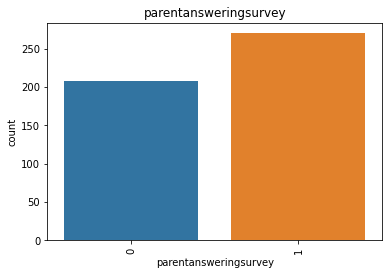

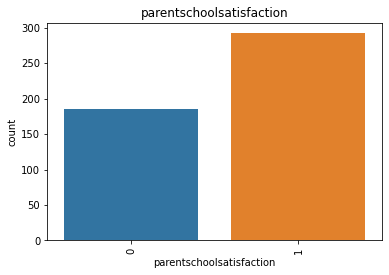

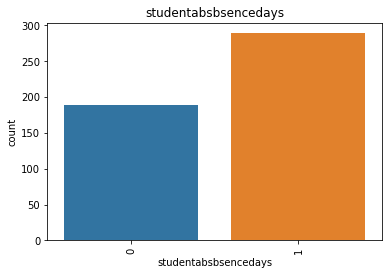

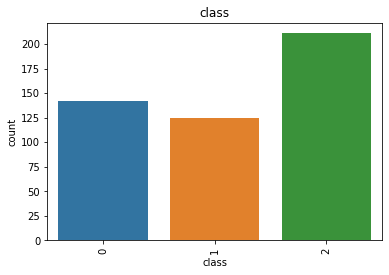

In [52]:
for i in cat_col:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [53]:
# inference = The male has more than female in gender column.
# nationality and place of birth (kw,jordan) are more in the count other.
#  middle school are more in count
# G-02 has more than count of all.
# A has more student
# it topic has enrolled more students.
#  f and s are estimated equal.
#  father has the more count than mum.
# this parentsasnweringsurvey has positive result.
# the paresntschoolsatisfaction is the GOOd .
# the most of studenst are in under-7.
# the class has the more in 'M' count.

In [54]:
df.columns

Index(['gender', 'natinallty', 'placeofbirth', 'satgeid', 'gradeid',
       'sectionid', 'topic', 'sem', 'relation', 'raisehands',
       'visltedresources', 'annoucementsviwer', 'dicussion',
       'parentansweringsurvey', 'parentschoolsatisfaction',
       'studentabsbsencedays', 'class'],
      dtype='object')

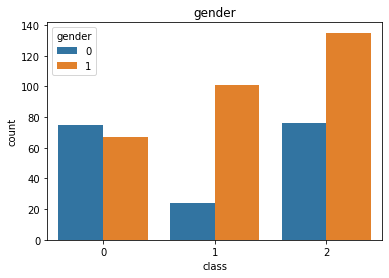

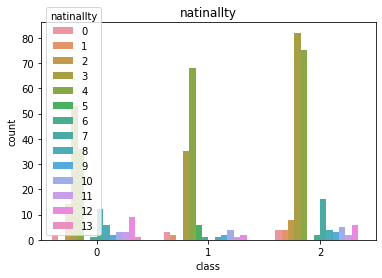

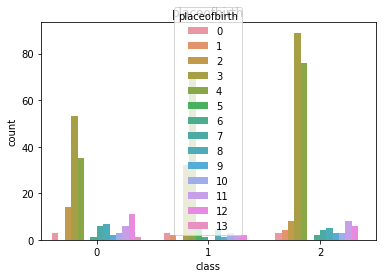

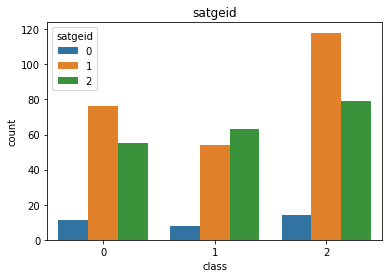

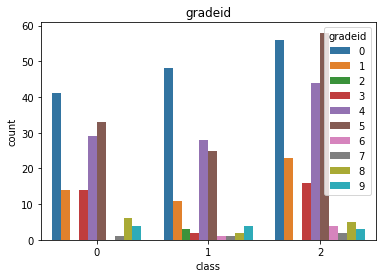

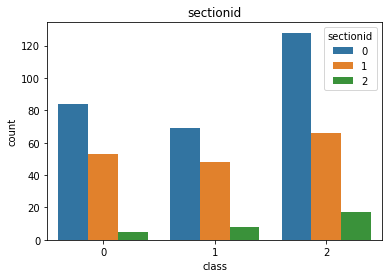

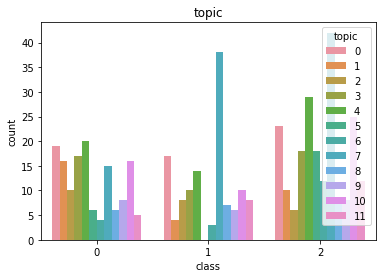

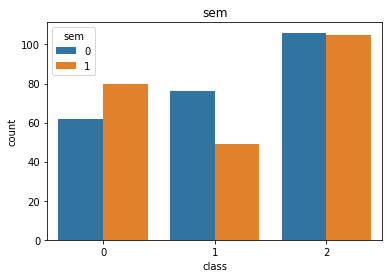

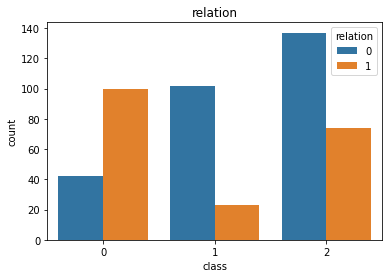

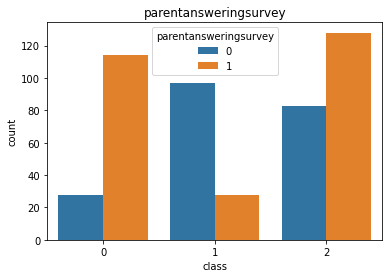

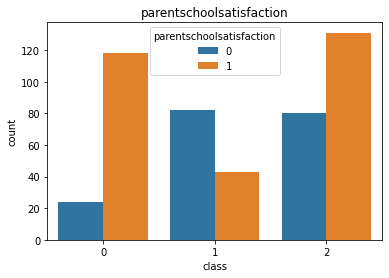

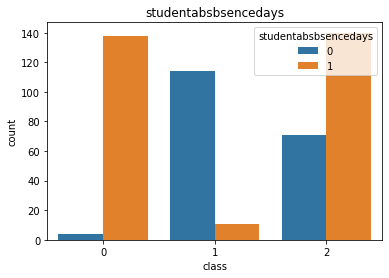

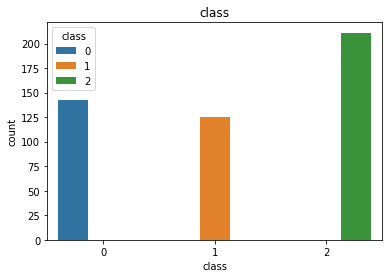

In [55]:
for i in cat_col:
    sns.countplot(x=df['class'],hue=df[i])
    plt.title(i)
    plt.show()

In [56]:
# inference = comparing the all columns to target variables(df[class])

# Bi-Variate Analysis

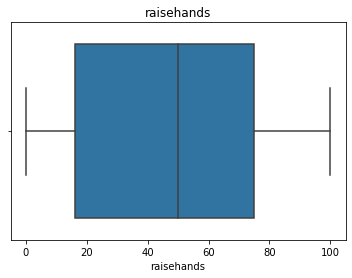

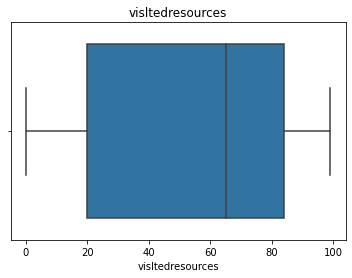

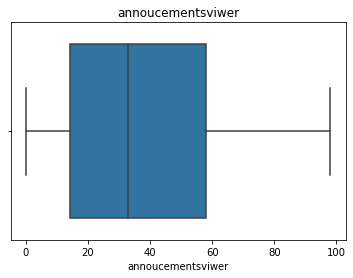

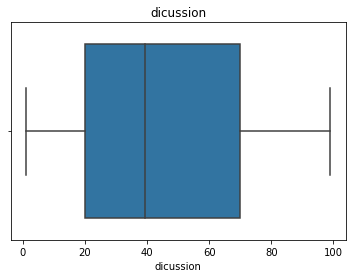

In [57]:
for i in int_col:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [58]:
# there are no outliers in the boxplot

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lb = LabelEncoder()
for i in cat_col:
    df[i] = lb.fit_transform(df[i])

In [61]:
# correlation

In [62]:
corr = df.corr()
corr

,gender,natinallty,placeofbirth,satgeid,gradeid,sectionid,topic,sem,relation,raisehands,visltedresources,annoucementsviwer,dicussion,parentansweringsurvey,parentschoolsatisfaction,studentabsbsencedays,class
gender,1.000000,-0.021963,-0.063321,-0.021309,0.020696,0.057498,0.032995,0.049252,-0.193010,-0.147663,-0.207840,-0.049547,-0.121700,-0.018838,-0.089929,-0.206013,0.124371
natinallty,-0.021963,1.000000,0.786539,-0.137159,0.121785,0.068075,0.075940,0.070742,0.001310,0.109812,0.025976,0.060996,-0.066109,0.077047,-0.004564,0.154895,-0.078226
placeofbirth,-0.063321,0.786539,1.000000,-0.174485,0.172000,0.083610,0.142776,0.078812,0.029835,0.076229,0.031072,0.076886,0.003831,0.038487,-0.097746,0.132311,-0.099419
satgeid,-0.021309,-0.137159,-0.174485,1.000000,-0.961648,0.301042,-0.045935,-0.029742,0.038141,-0.169522,-0.063185,-0.160409,-0.157238,-0.109442,0.020042,-0.107558,-0.010952
gradeid,0.020696,0.121785,0.172000,-0.961648,1.000000,-0.309055,0.059747,0.066514,-0.037889,0.179166,0.072399,0.179591,0.163963,0.113280,-0.024730,0.082769,0.012680
sectionid,0.057498,0.068075,0.083610,0.301042,-0.309055,1.000000,0.266655,0.046988,0.003093,-0.147129,-0.085450,-0.148170,-0.106506,-0.022204,-0.074772,0.033231,0.017070
topic,0.032995,0.075940,0.142776,-0.045935,0.059747,0.266655,1.000000,-0.036029,-0.141029,-0.081942,-0.120581,-0.065320,0.052517,0.002978,-0.066257,-0.038581,0.103382
sem,0.049252,0.070742,0.078812,-0.029742,0.066514,0.046988,-0.036029,1.000000,0.149307,0.177770,0.174611,0.287424,0.020484,0.023841,-0.025284,0.072952,-0.043366
relation,-0.193010,0.001310,0.029835,0.038141,-0.037889,0.003093,-0.141029,0.149307,1.000000,0.362379,0.357523,0.337537,0.022986,0.160518,0.284688,0.216394,-0.273119
raisehands,-0.147663,0.109812,0.076229,-0.169522,0.179166,-0.147129,-0.081942,0.177770,0.362379,1.000000,0.690635,0.642730,0.337300,0.313850,0.293960,0.461696,-0.232069


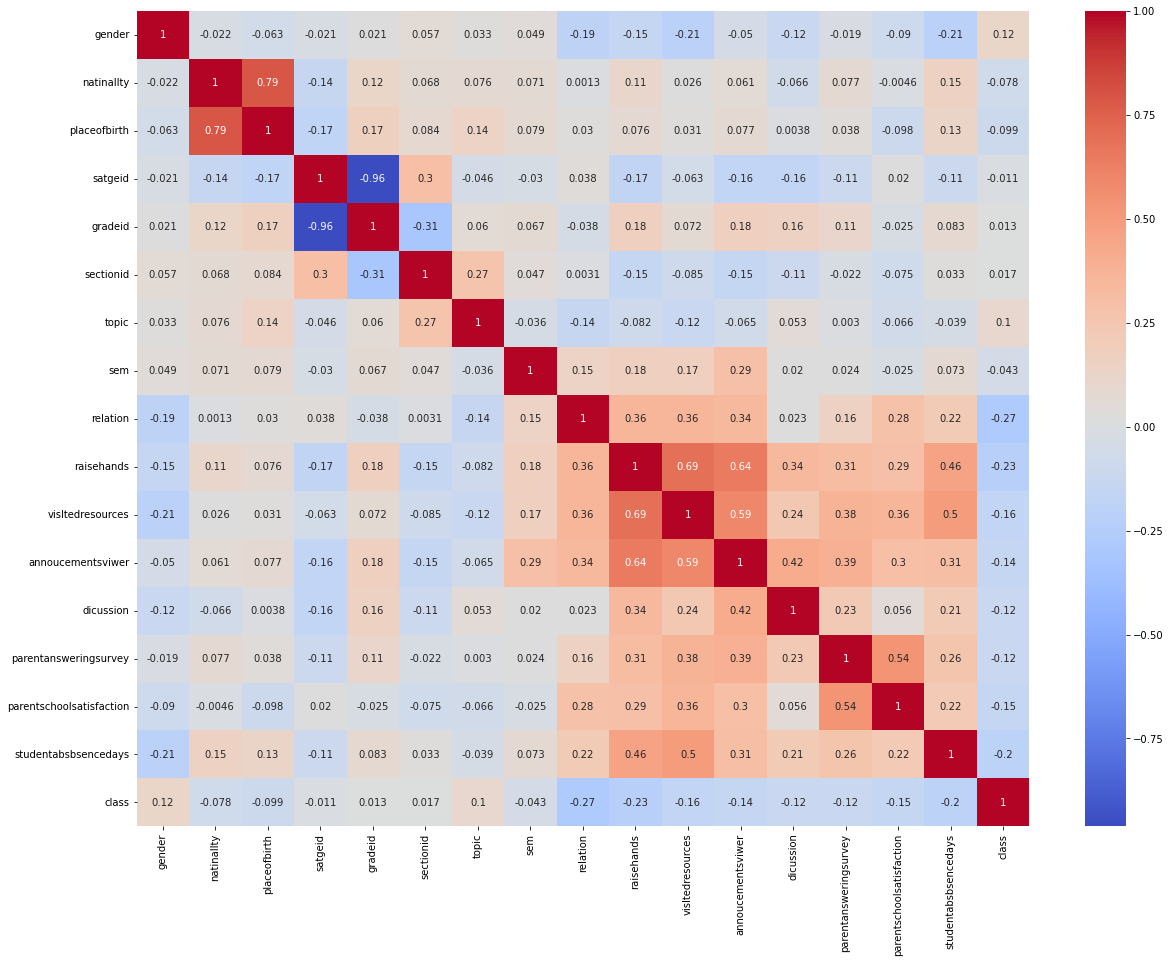

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [113]:
def high_corr(data,thresh):
    res = set()
    data = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >=thresh:
                res.add(corr.columns[i])
    return list(res)

multicorr = high_corr(df,0.5)
print(multicorr)

['annoucementsviwer', 'placeofbirth', 'visltedresources', 'parentschoolsatisfaction']


In [65]:
# inference = 'annoucementsviwer', 'placeofbirth', 'visltedresources', 'parentschoolsatisfaction' are having multicoliniarity.

# Outlier Handling

In [66]:
df.describe(percentiles=[0.01,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,3%,5%,50%,97%,98%,99%,max
gender,478.0,0.633891,0.482244,0.0,0.0,0.00,0.00,1.0,1.0,1.00,1.00,1.0
natinallty,478.0,4.351464,2.472895,0.0,0.0,1.31,2.00,4.0,12.0,12.00,12.00,13.0
placeofbirth,478.0,4.403766,2.632276,0.0,0.0,1.31,2.00,4.0,12.0,12.00,12.00,13.0
satgeid,478.0,1.343096,0.603505,0.0,0.0,0.00,0.00,1.0,2.0,2.00,2.00,2.0
gradeid,478.0,2.918410,2.462217,0.0,0.0,0.00,0.00,4.0,8.0,9.00,9.00,9.0
sectionid,478.0,0.474895,0.612926,0.0,0.0,0.00,0.00,0.0,2.0,2.00,2.00,2.0
topic,478.0,5.261506,3.394505,0.0,0.0,0.00,0.00,5.0,11.0,11.00,11.00,11.0
sem,478.0,0.489540,0.500414,0.0,0.0,0.00,0.00,0.0,1.0,1.00,1.00,1.0
relation,478.0,0.412134,0.492735,0.0,0.0,0.00,0.00,0.0,1.0,1.00,1.00,1.0
raisehands,478.0,46.887029,30.787903,0.0,0.0,2.00,4.85,50.0,95.0,97.46,100.00,100.0


In [67]:
# inference = natinallty,placeofbirth,raisehands,visltedresources,annoucementsviwer,dicussion

In [68]:
out_col = ['natinallty','placeofbirth','raisehands','visltedresources','annoucementsviwer','dicussion']

In [69]:
def outlier_treatment(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.03))
    return x

In [70]:
df[out_col] = df[out_col].apply(lambda x:outlier_treatment(x))

In [71]:
df[out_col].head()

,natinallty,placeofbirth,raisehands,visltedresources,annoucementsviwer,dicussion
0,4.0,4.0,15.0,16.0,2.00,20.0
1,4.0,4.0,20.0,20.0,3.00,25.0
2,4.0,4.0,10.0,7.0,1.31,30.0
3,4.0,4.0,30.0,25.0,5.00,35.0
4,4.0,4.0,40.0,50.0,12.00,50.0


# selecting x and y 

In [73]:
x = df.drop('class',axis=1)
y = df['class']
print(x.shape)
print(y.shape)

(478, 16)
(478,)


In [75]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(358, 16)
(120, 16)
(358,)
(120,)


In [100]:
from sklearn.linear_model import LogisticRegression

In [145]:
m1 = LogisticRegression(max_iter=5000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [146]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[2 2 0 2 0 2 2 2 1 0 2 2 1 0 2 1 0 0 1 0 2 0 2 1 1 2 2 2 2 0 1 1 0 1 2 2 2
 1 1 1 1 2 2 0 1 1 1 2 0 0 0 2 2 1 2 1 1 2 0 2 2 0 0 0 2 2 0 1 0 0 0 2 2 2
 0 2 2 2 1 0 1 0 2 2 0 0 0 2 0 2 2 1 2 2 0 2 2 1 2 2 1 2 1 2 2 0 1 2 2 1 2
 1 2 2 0 1 0 0 1 2]


In [147]:
print('training score',m1.score(x_train,y_train))
print('testing score',m1.score(x_test,y_test))

training score 0.8016759776536313
testing score 0.7666666666666667


In [158]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [159]:
cm = confusion_matrix(ypred_m1,y_test)
print('confusion matrix:\n',cm)

confusion matrix:
 [[24  0 10]
 [ 0 25  6]
 [ 5  7 43]]


In [160]:
print('classification report',classification_report(ypred_m1,y_test))

classification report               precision    recall  f1-score   support

           0       0.83      0.71      0.76        34
           1       0.78      0.81      0.79        31
           2       0.73      0.78      0.75        55

    accuracy                           0.77       120
   macro avg       0.78      0.76      0.77       120
weighted avg       0.77      0.77      0.77       120



# SGD Classifier

In [166]:
from sklearn.linear_model import SGDClassifier

In [179]:
m2 = SGDClassifier(max_iter=4000,eta0=0.01,loss='log_loss')
m2.fit(x_train,y_train)

SGDClassifier(eta0=0.01, loss='log_loss', max_iter=4000)

In [180]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 2 0 1 0 2 1 0 1 0 1 0 1 0 2 1 0 0 1 0 0 0 2 1 1 2 0 0 0 0 1 1 0 1 0 0 1
 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 2
 1 1 0 0 1 0 0 1 0]


In [181]:
print('training score',m2.score(x_train,y_train))
print('testing score',m2.score(x_test,y_test))

training score 0.5502793296089385
testing score 0.48333333333333334


In [182]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [183]:
cm = confusion_matrix(ypred_m2,y_test)
print(cm)

[[28  5 39]
 [ 1 25 15]
 [ 0  2  5]]


In [184]:
print(classification_report(ypred_m2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.39      0.55        72
           1       0.78      0.61      0.68        41
           2       0.08      0.71      0.15         7

    accuracy                           0.48       120
   macro avg       0.61      0.57      0.46       120
weighted avg       0.85      0.48      0.58       120



# Cross Validation

In [185]:
from sklearn.model_selection import cross_val_score,KFold
import warnings
warnings.filterwarnings('ignore')

In [188]:
kf = KFold(n_splits=10)
m3 = LogisticRegression(max_iter=4000)
score = cross_val_score(m3,x,y,cv=kf,scoring='accuracy')
print(score)
print(score.mean())

[0.77083333 0.70833333 0.58333333 0.8125     0.79166667 0.64583333
 0.77083333 0.8125     0.85106383 0.65957447]
0.7406471631205674
